In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# upload dataset
taxiDB = pd.read_csv('taxi_dataset.csv')

In [2]:
# what do we have here?
taxiDB.head(5)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N


In [3]:
# change the type of temporary columns
taxiDB['pickup_datetime'] = pd.to_datetime(taxiDB['pickup_datetime'])
taxiDB['dropoff_datetime'] = pd.to_datetime(taxiDB['dropoff_datetime'])

# create a new column with trip duration in seconds
taxiDB['trip_duration'] = (taxiDB['dropoff_datetime'] - taxiDB['pickup_datetime']).dt.total_seconds()

# for new objects we will not know this, so we will remove the column
taxiDB = taxiDB.drop('dropoff_datetime', axis=1)

In [4]:
# what do we have here now?
taxiDB.head(5)

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,1,-73.982155,40.767937,-73.964630,40.765602,N,455.0
1,id2377394,1,2016-06-12 00:43:35,1,-73.980415,40.738564,-73.999481,40.731152,N,663.0
2,id3858529,2,2016-01-19 11:35:24,1,-73.979027,40.763939,-74.005333,40.710087,N,2124.0
3,id3504673,2,2016-04-06 19:32:31,1,-74.010040,40.719971,-74.012268,40.706718,N,429.0
4,id2181028,2,2016-03-26 13:30:55,1,-73.973053,40.793209,-73.972923,40.782520,N,435.0


In [5]:
# this attribute takes values from 1 to 2, we translate into [0, 1]
taxiDB['vendor_id'] = taxiDB['vendor_id'] - 1

# encode another binary feature
taxiDB['store_and_fwd_flag'] = taxiDB.store_and_fwd_flag.apply(lambda x: 0 if x=='N' else 1)

In [6]:
# what do we have here now?
taxiDB.head(5)

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,1,2016-03-14 17:24:55,1,-73.982155,40.767937,-73.964630,40.765602,0,455.0
1,id2377394,0,2016-06-12 00:43:35,1,-73.980415,40.738564,-73.999481,40.731152,0,663.0
2,id3858529,1,2016-01-19 11:35:24,1,-73.979027,40.763939,-74.005333,40.710087,0,2124.0
3,id3504673,1,2016-04-06 19:32:31,1,-74.010040,40.719971,-74.012268,40.706718,0,429.0
4,id2181028,1,2016-03-26 13:30:55,1,-73.973053,40.793209,-73.972923,40.782520,0,435.0


In [7]:
# save 10 first lines in csv
taxiDB.head(10).to_csv('file1.csv', sep=';')

In [8]:
### try to convert coordinates to distance
# take standard values
allLat  = list(taxiDB['pickup_latitude']) + list(taxiDB['dropoff_latitude'])
medianLat  = sorted(allLat)[int(len(allLat)/2)]
latMultiplier  = 111.32

# see how far the fishin point is north/south of the start point
taxiDB['pickup_latitude']   = latMultiplier  * (taxiDB['pickup_latitude']   - medianLat)
taxiDB['dropoff_latitude']   = latMultiplier  * (taxiDB['dropoff_latitude']  - medianLat)

In [9]:
# what do we have here now?
taxiDB.head(5)

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,1,2016-03-14 17:24:55,1,-73.982155,1.516008,-73.964630,1.256121,0,455.0
1,id2377394,0,2016-06-12 00:43:35,1,-73.980415,-1.753813,-73.999481,-2.578912,0,663.0
2,id3858529,1,2016-01-19 11:35:24,1,-73.979027,1.070973,-74.005333,-4.923841,0,2124.0
3,id3504673,1,2016-04-06 19:32:31,1,-74.010040,-3.823568,-74.012268,-5.298809,0,429.0
4,id2181028,1,2016-03-26 13:30:55,1,-73.973053,4.329328,-73.972923,3.139453,0,435.0


In [10]:
# take standard values
allLong = list(taxiDB['pickup_longitude']) + list(taxiDB['dropoff_longitude'])
medianLong  = sorted(allLong)[int(len(allLong)/2)]
longMultiplier = np.cos(medianLat*(np.pi/180.0)) * 111.32

# see how far the fishin point is west/east of the start point
taxiDB['pickup_longitude']  = longMultiplier * (taxiDB['pickup_longitude']  - medianLong)
taxiDB['dropoff_longitude']  = longMultiplier * (taxiDB['dropoff_longitude'] - medianLong)

In [11]:
# what do we have here now?
taxiDB.head(5)

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,1,2016-03-14 17:24:55,1,-0.110015,1.516008,1.367786,1.256121,0,455.0
1,id2377394,0,2016-06-12 00:43:35,1,0.036672,-1.753813,-1.571088,-2.578912,0,663.0
2,id3858529,1,2016-01-19 11:35:24,1,0.153763,1.070973,-2.064547,-4.923841,0,2124.0
3,id3504673,1,2016-04-06 19:32:31,1,-2.461500,-3.823568,-2.649362,-5.298809,0,429.0
4,id2181028,1,2016-03-26 13:30:55,1,0.657515,4.329328,0.668452,3.139453,0,435.0


In [12]:
### finally, let's calculate the geographic distance "distance_km":
# find the difference in latitude/longitude
taxiDB['long_diff'] = taxiDB['dropoff_longitude'] - taxiDB['pickup_longitude']
taxiDB['lat_diff'] = taxiDB['dropoff_latitude'] - taxiDB['pickup_latitude']

# formula from google :)
taxiDB['distance_km'] = (taxiDB['long_diff']**2 + taxiDB['lat_diff']**2)**(1/2)

# we don't need these two columns anymore
taxiDB = taxiDB.drop(['long_diff', 'lat_diff'], axis=1)

In [13]:
# and these too
taxiDB = taxiDB.drop(['pickup_longitude', 'dropoff_longitude',
                      'pickup_latitude', 'dropoff_latitude'], axis=1)

In [14]:
# what do we have here now?
taxiDB.head(5)

,id,vendor_id,pickup_datetime,passenger_count,store_and_fwd_flag,trip_duration,distance_km
0,id2875421,1,2016-03-14 17:24:55,1,0,455.0,1.500479
1,id2377394,0,2016-06-12 00:43:35,1,0,663.0,1.807119
2,id3858529,1,2016-01-19 11:35:24,1,0,2124.0,6.392080
3,id3504673,1,2016-04-06 19:32:31,1,0,429.0,1.487155
4,id2181028,1,2016-03-26 13:30:55,1,0,435.0,1.189925


In [15]:
# save 10 first lines in csv
taxiDB.head(10).to_csv('file2.csv', sep=';')

In [18]:
# implement the trick with Mean-target encoding as in practice. Replace "passenger_count" column with
# "category_encoded" column
taxiDB['passenger_count'] = taxiDB['passenger_count'].map(taxiDB
                                                          .groupby('passenger_count')['trip_duration']
                                                          .mean())

# the last not processed column is "id". use it as an identifier
taxiDB = taxiDB.set_index('id')

# all right?
taxiDB.head()

,vendor_id,pickup_datetime,passenger_count,store_and_fwd_flag,trip_duration,distance_km
id,,,,,,
id2875421,1,2016-03-14 17:24:55,930.399753,0,455.0,1.500479
id2377394,0,2016-06-12 00:43:35,930.399753,0,663.0,1.807119
id3858529,1,2016-01-19 11:35:24,930.399753,0,2124.0,6.392080
id3504673,1,2016-04-06 19:32:31,930.399753,0,429.0,1.487155
id2181028,1,2016-03-26 13:30:55,930.399753,0,435.0,1.189925


In [19]:
### okay, save it :)
taxiDB.to_csv('taxi_result.csv', sep=';')

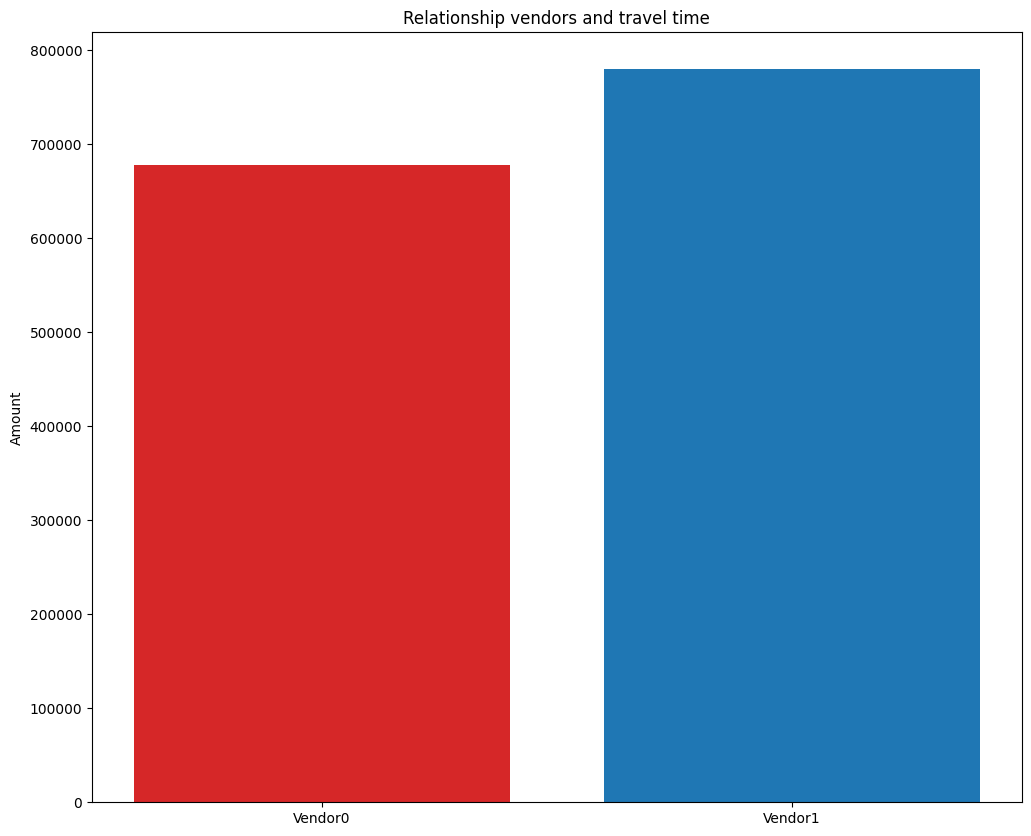

In [30]:
# see how the target variable is related to others
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
vendor = ['Vendor0', 'Vendor1']
counts = [taxiDB[taxiDB['vendor_id'] == 0].shape[0], taxiDB[taxiDB['vendor_id'] == 1].shape[0]]
bar_labels = ['vendor=0', 'vendor=1']
bar_colors = ['tab:red', 'tab:blue']

ax.bar(vendor, counts, label=bar_labels, color=bar_colors)

ax.set_ylabel('Amount')
ax.set_title('Relationship vendors and travel time')

fig.set_size_inches(12, 10)
plt.show()

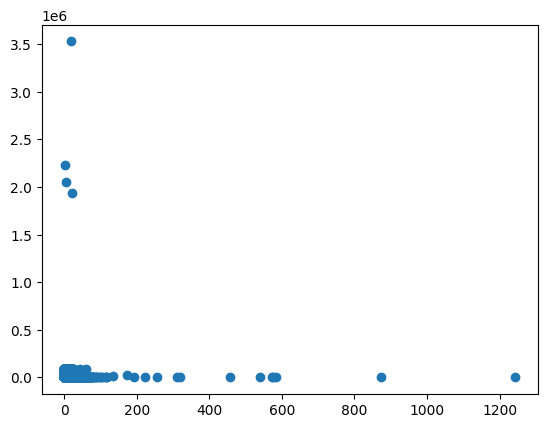

In [39]:
# is there a relationship?
x = taxiDB['distance_km']
y = taxiDB['trip_duration']

plt.scatter(x, y)
plt.show()

<BarContainer object of 5 artists>

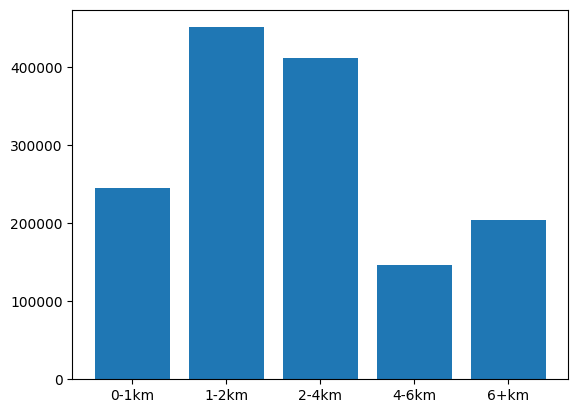

In [47]:
# oops, the scheme is bad. Let's try bars again
fig, ax = plt.subplots()

distance = ['0-1km', '1-2km', '2-4km', '4-6km', '6+km']
duration = [taxiDB[taxiDB['distance_km'] <= 1].shape[0],
            taxiDB[(taxiDB['distance_km'] <= 2) & (taxiDB['distance_km'] > 1)].shape[0],
            taxiDB[(taxiDB['distance_km'] <= 4) & (taxiDB['distance_km'] > 2)].shape[0],
            taxiDB[(taxiDB['distance_km'] <= 6)  & (taxiDB['distance_km'] > 4)].shape[0],
            taxiDB[taxiDB['distance_km'] > 6].shape[0]]

ax.bar(distance, duration)